## Análisis Financiero: Piloto AI Industrial (Optimización de Procesos) NI

Se presenta el análisis financiero correspondiente al caso de negocio del **Piloto Industrial de Optimización de Procesos en Ingenio Monte Rosa, Nicaragua**.

Este análisis comprende análisis de *Valor Presente Neto, Tasa Interna de Retorno y Payback*, considerando una vida útil de *10 años* para los beneficios del piloto. 


### Estimación de Azúcar Adicional en Función de la Recuperación Global

El piloto industrial *optimiza* variables de proceso con el objetivo de **maximizar** la función de transferencia (Yield Function):

$$Yield = \frac{Sugar_{output}}{Sugar_{input}}$$

en los procesos de *Extracción de Jugo*, *Clarificación de Jugo*, *Clarificación de Meladura* y *Centrífugas*, lo que resulta en una mejora en el KPI de ***Recuperación Global (%)*** de la fábrica. 

*Los detalles de la estimación de mejora sobre la Recuperación Industrial se encuentran en el documento Pro Economic Benefits*   


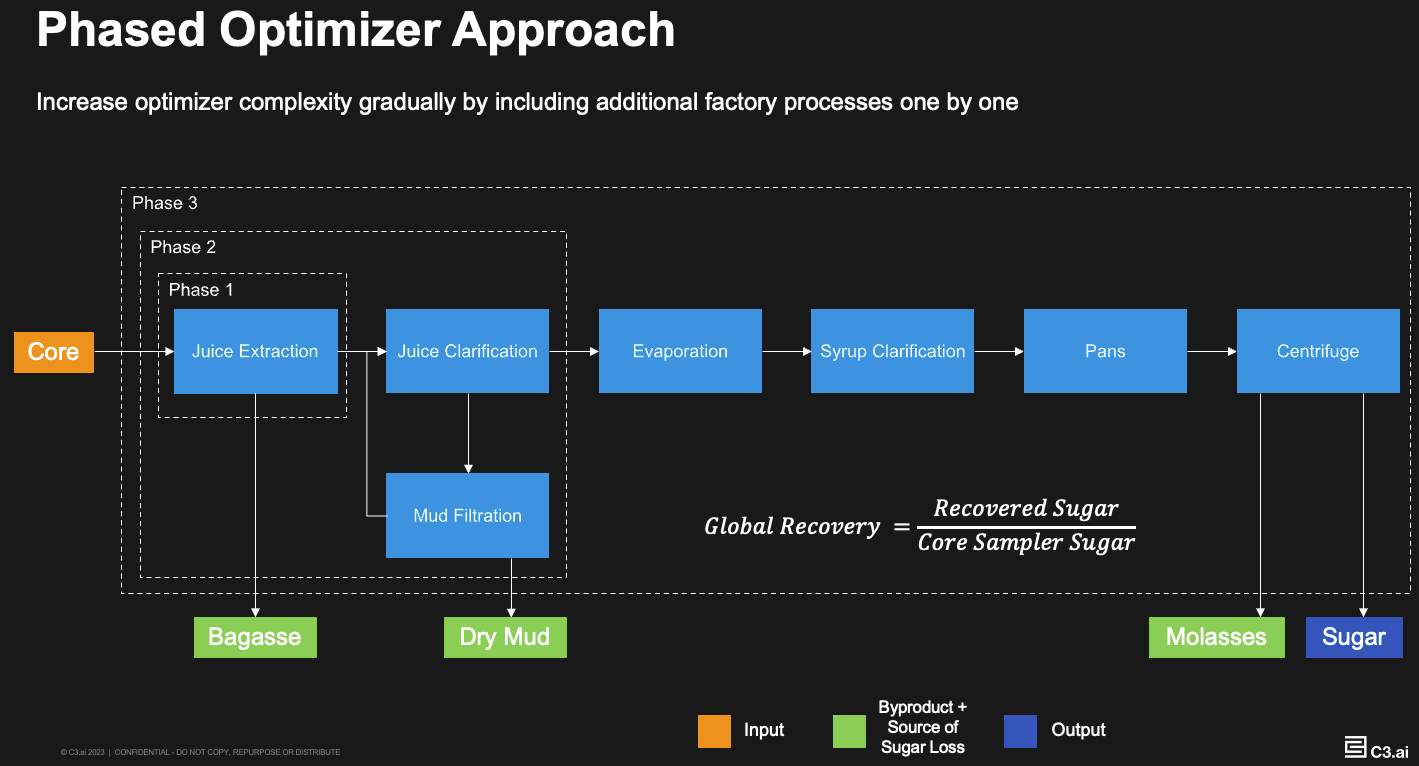

Existe una mejora en la recuperación global, debida al incremento en Yield obtenido por medio de Backtesting sobre la zafra anterior.

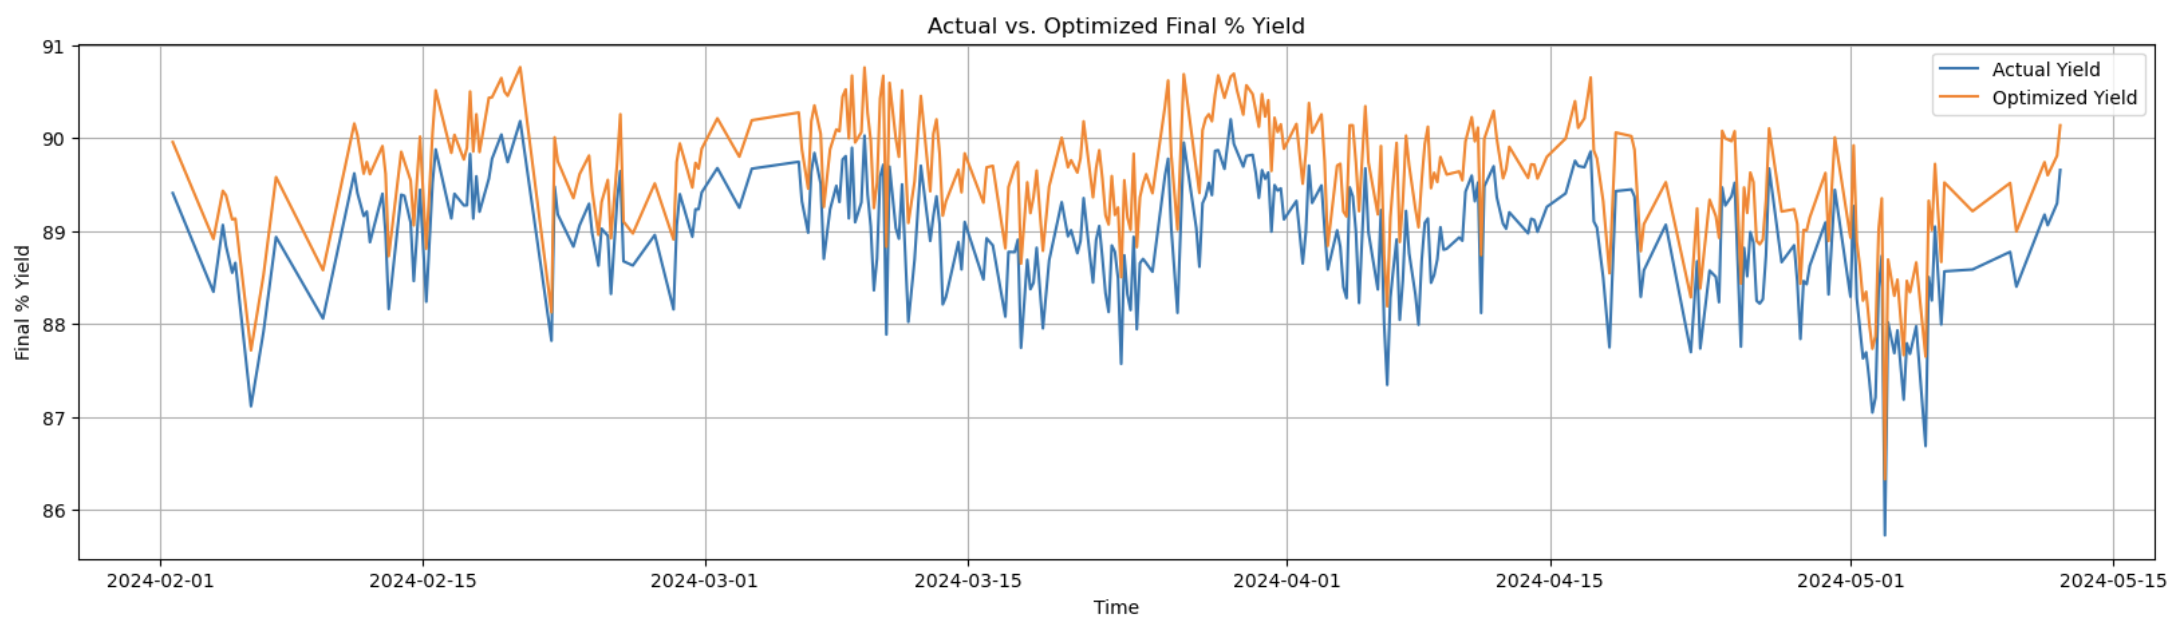

La mejora en Recuperación obtenida *en estos procesos* es de **2.276%** en promedio. Para encontrar la mejora en la Recuperación Global es necesario aplicar esta mejora sobre la Recuperación Global del año anterior de **82.46%**.

### Beneficio Azúcar
#### Parámetros:

- **Beneficio Azúcar Marginal (USD/qq)**: El beneficio que se obtiene del azúcar que margina (calidad de azúcar que no está maximizada para el ingenio específico).
- **Inversión (USD)**: Monto de la Inversión inicial del piloto.
- **Recuperación Global Actual (%)**: Desempeño de Recuperación Global actual de la Fábrica.
- **Mejora del Proyecto (%)**: Mejora en la Recuperación Global debida al Piloto de AI.
- **Utilización del Piloto (%)**: Proporción del tiempo que se estima opere el Piloto de AI en la zafra, debido a Mantenimientos, Tiempos Perdidos, etc.
- **Rendimiento Core (kg/t)**: Rendimiento Actual de Azúcar de Caña (kg Azúcar/t Caña).
- **Toneladas de Caña (t)**: Total de Caña disponible para moler en la Zafra.

In [6]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Parametros
Beneficio_Marginal = 15.80
Inversion = 250000
Recuperacion_Global = 0.8246
Mejora_Proyecto = 0.02276
Utilizacion = 0.65
Rendimiento_Core = 123.62
Toneladas_Caña = 2809053.66

# diccionario de parametros
dict = {'Beneficio Marginal (USD/qq)': Beneficio_Marginal, 'Inversion Inicial (USD)': Inversion, 'Recuperación Global Actual (%)': Recuperacion_Global*100,
        'Mejora del Proyecto (%)': Mejora_Proyecto*100, 'Utilizacion (%)': Utilizacion*100, 'Rendimiento Core (kg/t)': Rendimiento_Core, 'Total de Caña (t)': Toneladas_Caña}

# dataframe final
df = pd.DataFrame([dict])
df

,Beneficio Marginal (USD/qq),Inversion Inicial (USD),Recuperación Global Actual (%),Mejora del Proyecto (%),Utilizacion (%),Rendimiento Core (kg/t),Total de Caña (t)
0,15.8,250000,82.46,2.276,65.0,123.62,2809053.66


- La Recuperación Global Optimizada es la Recuperación Global Actual más la Mejora del Proyecto (porcentaje de la Recuperación Global Actual).
- La Caña Optimizada es el Total de Caña multiplicado por el Porcentaje de Utilización.
- El azúcar disponible en el Core Sampler es el Rendimiento Core multiplicado por la Caña Optimizada.
- El azúcar adicional obtenida es la diferencia de azúcar con la Recuperación Global Optimizada y la Recuperación Global Actual

In [8]:
# Estimación de Azúcar Adicional
Recuperacion_AI = Recuperacion_Global + Recuperacion_Global * Mejora_Proyecto
Caña_Optimizacion = Toneladas_Caña * Utilizacion
Azucar_Core = Rendimiento_Core * Caña_Optimizacion / 1000

Azucar_Industrial_Sin_AI = Azucar_Core * Recuperacion_Global
Azucar_Industrial_Con_AI = Azucar_Core * Recuperacion_AI
Azucar_Adicional = Azucar_Industrial_Con_AI - Azucar_Industrial_Sin_AI

print("Azúcar Adicional (t):", np.round(Azucar_Adicional,2))

Azúcar Adicional (t): 4236.21


### Beneficio Azúcar
Se calcula el beneficio total basado en ingresos por precio y costos de Químicos, Envase y Logística.

#### Parámetros:
- **Precio Azúcar (USD/t)**: Precio por tonelada de azúcar que margina (no maximizada en el ingenio).
- **Costo Químicos (USD/t)**: Costo de Químicos.
- **Costo Envase (USD/t)**: Costo de Envase.
- **Costo Logístico (USD/t)**: Costos Logísticos.


In [9]:
Precio_Azucar = np.round(Beneficio_Marginal*22.0462 - 28.64,2)
Costo_Quimicos = 7.00
Costo_Envase = 6.00
Costo_Logistico = 18.00

# diccionario de parametros
dict = {'Precio de Azúcar (USD/t)': Precio_Azucar, 'Costo de Químicos (USD/t)': Costo_Quimicos, 'Costo de Envase (USD/t)': Costo_Envase,
        'Costo Logístico (USD/t)': Costo_Logistico}

# dataframe final
df = pd.DataFrame([dict])
df

,Precio de Azúcar (USD/t),Costo de Químicos (USD/t),Costo de Envase (USD/t),Costo Logístico (USD/t)
0,319.69,7.0,6.0,18.0


In [10]:
Beneficio_Azucar = (Precio_Azucar - Costo_Quimicos - Costo_Envase - Costo_Logistico) * Azucar_Adicional
print("Beneficio Azúcar (USD):", np.round(Beneficio_Azucar,2))

Beneficio Azúcar (USD): 1222952.14


### Valuación de Inversión
Se calcula la Utilidad Neta Marginal basado en el EBITDA Marginal resultado de los flujos Ingreso y Costo. Posteriormente se calcula el Flujo de Caja Libre para Valuación, descontando la Depreciación.

#### Parámetros
- **Vida Util (años)**: Años de Vida útil de la inversión.
- **Costos Marginales (USD)**: Costos relacionados a la operación del piloto de AI.
- **Tiempo de Depreciación (años)**: Años en los que se considera se deprecia hasta un valor terminal de 0 el activo de inversión.
- **Impuestos sobre EBITDA (%)**: Tax Rate sobre EBITDA

In [11]:
Vida_Util = 10
Costo_Marginal = 209000
Tiempo_Depreciacion = 3
Tax_Rate = 0.25

# diccionario de parametros
dict = {'Vida Útil (años)': Vida_Util, 'Costo Marginal (USD/año)': Costo_Marginal, 'Tiempo de Depreciación (años)': Tiempo_Depreciacion,
        'Tax Rate (%)': Tax_Rate*100}

# dataframe final
df = pd.DataFrame([dict])
df

,Vida Útil (años),Costo Marginal (USD/año),Tiempo de Depreciación (años),Tax Rate (%)
0,10,209000,3,25.0


In [12]:
# Ingresos
Ingresos_Marginales = np.full((1,Vida_Util),Beneficio_Azucar)

# Costos
Costos_Marginales = np.full((1,Vida_Util),Costo_Marginal)

# Impuestos
Impuestos = np.full((1,Vida_Util),Tax_Rate)

# EBITDA
EBITDA = Ingresos_Marginales - Costos_Marginales

# Depreciación
Depreciacion = np.full((1,Tiempo_Depreciacion),Inversion/Tiempo_Depreciacion)

# EBITDA Marginal
EBITDA_Marginal = EBITDA

for i in range(Tiempo_Depreciacion):
    EBITDA_Marginal[0,i] = EBITDA[0,i] - Depreciacion[0,i]

# Impuestos Marginales
Impuestos_Marginal = EBITDA_Marginal * Impuestos

# Utilidad Neta
Utilidad_Neta = EBITDA_Marginal - Impuestos_Marginal

### Utilidad Neta

In [13]:
year = 1
for i in Utilidad_Neta[0]:
    print("Utilidad Neta Año",year,": USD",np.round(i,2))
    year += 1

Utilidad Neta Año 1 : USD 697964.1
Utilidad Neta Año 2 : USD 697964.1
Utilidad Neta Año 3 : USD 697964.1
Utilidad Neta Año 4 : USD 760464.1
Utilidad Neta Año 5 : USD 760464.1
Utilidad Neta Año 6 : USD 760464.1
Utilidad Neta Año 7 : USD 760464.1
Utilidad Neta Año 8 : USD 760464.1
Utilidad Neta Año 9 : USD 760464.1
Utilidad Neta Año 10 : USD 760464.1


### EBITDA Marginal

In [14]:
year = 1
for i in EBITDA_Marginal[0]:
    print("EBITDA Marginal Año",year,": USD",np.round(i,2))
    year += 1

EBITDA Marginal Año 1 : USD 930618.8
EBITDA Marginal Año 2 : USD 930618.8
EBITDA Marginal Año 3 : USD 930618.8
EBITDA Marginal Año 4 : USD 1013952.14
EBITDA Marginal Año 5 : USD 1013952.14
EBITDA Marginal Año 6 : USD 1013952.14
EBITDA Marginal Año 7 : USD 1013952.14
EBITDA Marginal Año 8 : USD 1013952.14
EBITDA Marginal Año 9 : USD 1013952.14
EBITDA Marginal Año 10 : USD 1013952.14


### Flujos de Caja

In [15]:
# Flujo de Caja
Flujo_Caja = Utilidad_Neta
for i in range(Tiempo_Depreciacion):
    Flujo_Caja[0,i] = Utilidad_Neta[0,i] + Depreciacion[0,i]

Flujo_Caja = np.append([[-Inversion]],Flujo_Caja)

year = 1
for i in Flujo_Caja:
    print("Flujo de Caja Año",year,": USD",np.round(i,2))
    year += 1

Flujo de Caja Año 1 : USD -250000.0
Flujo de Caja Año 2 : USD 781297.44
Flujo de Caja Año 3 : USD 781297.44
Flujo de Caja Año 4 : USD 781297.44
Flujo de Caja Año 5 : USD 760464.1
Flujo de Caja Año 6 : USD 760464.1
Flujo de Caja Año 7 : USD 760464.1
Flujo de Caja Año 8 : USD 760464.1
Flujo de Caja Año 9 : USD 760464.1
Flujo de Caja Año 10 : USD 760464.1
Flujo de Caja Año 11 : USD 760464.1


In [16]:
# Flujo de Caja Acumulado
Flujo_Caja_Acumulado = np.cumsum(Flujo_Caja,axis=0)

year = 1
for i in Flujo_Caja_Acumulado:
    print("Flujo de Caja Acumulado al Año",year,": USD",np.round(i,2))
    year += 1

Flujo de Caja Acumulado al Año 1 : USD -250000.0
Flujo de Caja Acumulado al Año 2 : USD 531297.44
Flujo de Caja Acumulado al Año 3 : USD 1312594.87
Flujo de Caja Acumulado al Año 4 : USD 2093892.31
Flujo de Caja Acumulado al Año 5 : USD 2854356.41
Flujo de Caja Acumulado al Año 6 : USD 3614820.51
Flujo de Caja Acumulado al Año 7 : USD 4375284.61
Flujo de Caja Acumulado al Año 8 : USD 5135748.72
Flujo de Caja Acumulado al Año 9 : USD 5896212.82
Flujo de Caja Acumulado al Año 10 : USD 6656676.92
Flujo de Caja Acumulado al Año 11 : USD 7417141.02


### Indicadores

Se calculan los indicadores de inversión

#### Parámetros
- **WACC (%)**:  Weighted Average Cost of Capital.

In [17]:
# WACC
WACC = 0.101

# NPV
NPV = np.round(npf.npv(WACC,Flujo_Caja),2)

# IRR
IRR = np.round(npf.irr(Flujo_Caja),2)

# Profitability Index
P_Index = np.round(NPV / Inversion,2)

# Ratio
Ratio = 1 - Flujo_Caja_Acumulado / Flujo_Caja

#Payback Period
t = min(np.argwhere(np.where(Flujo_Caja_Acumulado > 0, 1, 0)))
Payback_Period = (t[0] - 1 +Ratio[t[0]])


# diccionario de parametros
dict = {'WACC (%)': WACC*100, 'NPV (USD)': NPV, 'IRR (%)': IRR*100, 'Profitability Index': P_Index, 'Payback Period (years)': Payback_Period}

# dataframe final
df = pd.DataFrame([dict])
df

,WACC (%),NPV (USD),IRR (%),Profitability Index,Payback Period (years)
0,10.1,4454434.9,312.0,17.82,0.319981
